In [370]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use("bmh")

In [371]:
# funcion para campo electrico


def campo_electrico(X, Y, q, q_loc):
    # Actualizar matrices de coordenadas
    X_new = X-q_loc[0]
    Y_new = Y-q_loc[1]
    # Constante de Coulomb
    k_e = 8987539422

    # Matrices de radio cuadrado y radio
    r_2 = X_new**2+Y_new**2
    r = r_2**(1/2)

    # Matriz 1/r para los componentes
    r_1_2 = r_2**-1

    # Relacion Trigonometrica para angles
    rel = np.divide(X_new, r)
    angles = np.angle(X_new+Y_new*1j) 
    mcos = np.cos(angles)
    msin = np.sin(angles)
    # Componentes del campo electrico
    Ex = k_e*q*r_1_2*mcos
    Ey = k_e*q*r_1_2*msin

    return Ex, Ey

In [372]:
# Indice Cercano
def find_nearest_indx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [373]:
def Barra_electrica(X, Y, q, minX, maxX, y, N):
    q = q

    # Definir coordenasas, x es un espacio lineal con todas las coordenadas
    qloc_x_range = np.linspace(minX, maxX, N)
    qloc_y = y

    # Inicializar campo electrico
    Ex = np.zeros((len(X), len(X[0])))
    Ey = np.zeros((len(X), len(X[0])))

    for i, qloc_x in enumerate(qloc_x_range):

        # Para correr este paso necesitas asegurarte que la función getField() funcione correctamente
        this_Ex, this_Ey = campo_electrico(X, Y, q, [qloc_x, qloc_y])

        # Actualiza los valores de Ex y Ey
        Ex = Ex + this_Ex
        Ey = Ey + this_Ey

    return Ex, Ey


In [374]:
def Barra_electrica_v(X, Y, q, minY, maxY, x, N):
    q = q

    # Definir coordenasas, x es un espacio lineal con todas las coordenadas
    qloc_y_range = np.linspace(minY, maxY, N)
    qloc_x = x

    # Inicializar campo electrico
    Ex = np.zeros((len(X), len(X[0])))
    Ey = np.zeros((len(X), len(X[0])))

    for i, qloc_y in enumerate(qloc_y_range):

        # Para correr este paso necesitas asegurarte que la función getField() funcione correctamente
        this_Ex, this_Ey = campo_electrico(X, Y, q, [qloc_x, qloc_y])

        # Actualiza los valores de Ex y Ey
        Ex = Ex + this_Ex
        Ey = Ey + this_Ey

    return Ex, Ey

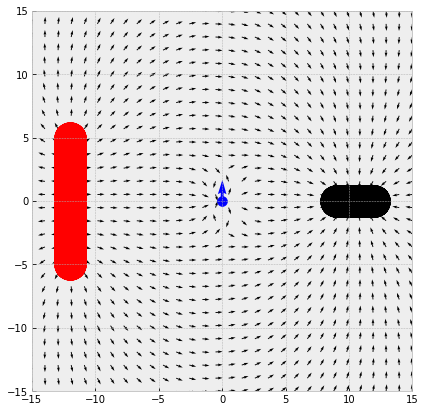

In [375]:
def main():
    # Parametros Iniciales
    #N = 20
    grid_min = -15
    grid_max = 15
    
    N = abs(grid_min)+ abs(grid_max)
    # Incializar espacios lineales

    x = np.linspace(grid_min, grid_max, N)
    y = np.linspace(grid_min, grid_max, N)

    # Crear Matrices de coordenadas vectoriales
    X, Y = np.meshgrid(x, y)

    # Definir coordenasas, x es un espacio lineal con todas las coordenadas
    
    #Coordenadas Barras electricas
    #Barra Horizontañ
    minX = 9
    maxX = 12
    qloc_y = 0
    
    #Barra Vertical
    minY = -5
    maxY= 5
    qloc_x = -12
    
    #Coordenadas del dipolo
    cord_x = 0
    cord_y = 0
    
    q_loc = [cord_x + 0.1, cord_y]
    q2_loc = [cord_x-0.1, cord_y]

    
    #Cargas
    #Barra electrica
    # Definir carga Horizontal
    q = -20*math.exp(-6)
    
    # Definir carga Vertical
    q2 = 20*math.exp(-6)
    
    # Dipolo 
        # Cargas Experimentales
    q_d = 200*math.exp(-2)
    q2_d = -201*math.exp(-2)
    
    # Parametros Barra electrica
    total_unidades = abs(minX) + abs(maxX)
    carga_por_unidad = 30

    Nb = carga_por_unidad * total_unidades
    
    # componentes de las barras electricas
    Ex1, Ey1 = Barra_electrica(X, Y, q, minX, maxX, qloc_y, Nb)
    Ex2, Ey2 = Barra_electrica_v(X, Y, q2, minY, maxY, qloc_x, Nb)

    Ex_b = Ex1 + Ex2
    Ey_b = Ey1 + Ey2
    
  
    # Agregar Dipolo
    #Calcular fuerza del dipolo electrico
    """
    dis_x = (abs(q_loc[0])+abs(q2_loc[0]))/2
    dis_y = (abs(q_loc[1])+abs(q2_loc[1]))/2
    cord_x = q_loc[0] + dis_x
    cord_y = q2_loc[1] + dis_y
    """
    
    

    
    # Componentes
    Cx = Ex_b[cord_x ,cord_y] * q_d
    Cy = Ey_b[cord_x ,cord_y] * q_d
    
    Cx2 = Ex_b[cord_x ,cord_y] * q2_d
    Cy2 = Ey_b[cord_x ,cord_y] * q2_d
    
    C_totx = (Cx + Cx2) 
    C_toty = (Cy +Cy2) 

    # Componentes de las cargas del dipolo
    Ex, Ey = campo_electrico(X, Y, q_d, q_loc)
    Ex2, Ey2 = campo_electrico(X, Y, q2_d, q2_loc)

    Ex_def = Ex+Ex2 + Ex_b
    Ey_def = Ey+Ey2 + Ey_b

    # A partir de aqui, he creado una nueva figura en la que se mostraran los vectores unitarios
    # Crear Matriz con magnitudes de vectores
    mags = (Ex_def**2+Ey_def**2)**(1/2)

    # Vectores Unitarios
    Ex_unit = np.divide(Ex_def, mags)
    Ey_unit = np.divide(Ey_def, mags)
    


    # Crear ejes y Figura
    fig, ax = plt.subplots(figsize=(7, 7))
    # Crear Campo Vectorial

    ax.quiver(X, Y, Ex_unit, Ey_unit)
    ax.quiver(cord_x,cord_y,C_totx,C_toty, color = "blue")

    # Dibujar Carga puntual
    if (q > 0):
        for i, qloc_x2 in enumerate(np.linspace(minX, maxX, 1000)):
            ax.scatter(qloc_x2, qloc_y, c='red', s=1000)
    else:
        for i, qloc_x2 in enumerate(np.linspace(minX, maxX, 1000)):
            ax.scatter(qloc_x2, qloc_y, c='black', s=1000)

            
            
            
    if (q2 > 0):
        for i, qloc_y in enumerate(np.linspace(minY, maxY, 1000)):
            ax.scatter(qloc_x, qloc_y, c='red', s=1000)
    else:
        for i, qloc_y in enumerate(np.linspace(minY, maxY, 1000)):
            ax.scatter(qloc_x, qloc_y, c='black', s=1000)
    
            
    #Cargas del dipolo
    
    """
    if (q_d > 0):
        ax.scatter(q_loc[0], q_loc[1], c='red', s=200)
    else:
        ax.scatter(q_loc[0], q_loc[1], c='black', s=200)

    if (q2_d > 0):
        ax.scatter(q2_loc[0], q2_loc[1], c='red', s=200)    
    else:
        ax.scatter(q2_loc[0], q2_loc[1], c='black', s=200)    
    """
    ax.scatter(cord_x, cord_y, c='blue', s=100)
    # Configuramos las dimensiones del eje y el aspecto
    ax.axis([grid_min, grid_max, grid_min, grid_max])
    ax.set_aspect('equal', 'box')

    plt.show()

main()

